In [19]:
# import library
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import warnings

warnings.filterwarnings("ignore") # Suppress warnings for cleaner output


In [33]:
# import data
dom_df = pd.read_csv("../data/store4128combined.csv",index_col=0)

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [34]:
dom_df.head(5)

,WeekStarting,dom_qty,mm_qty,trp_qty,dom_ad,mm_ad,trp_ad,dom_price,mm_price,trp_price,dom_rev,mm_rev,trp_rev,dom_qty_lag_1,dom_qty_lag_2,dom_qty_lag_3,mm_qty_lag_1,mm_qty_lag_2,mm_qty_lag_3,trp_qty_lag_1,trp_qty_lag_2,trp_qty_lag_3,dom_price_lag_1,dom_price_lag_2,dom_price_lag_3,mm_price_lag_1,mm_price_lag_2,mm_price_lag_3,trp_price_lag_1,trp_price_lag_2,trp_price_lag_3,dom_rev_lag_1,dom_rev_lag_2,dom_rev_lag_3,mm_rev_lag_1,mm_rev_lag_2,mm_rev_lag_3,trp_rev_lag_1,trp_rev_lag_2,trp_rev_lag_3
0,1990-06-14,18800,11269,11269,1,1,1,2.62,2.51,2.51,49256.00,28285.19,28285.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-06-21,19493,10512,10512,1,1,1,2.49,1.91,1.91,48537.57,20077.92,20077.92,18800.0,NaN,NaN,11269.0,NaN,NaN,11269.0,NaN,NaN,2.62,NaN,NaN,2.51,NaN,NaN,2.51,NaN,NaN,49256.00,NaN,NaN,28285.19,NaN,NaN,28285.19,NaN,NaN
2,1990-06-28,13994,14028,14028,1,1,1,2.06,2.55,2.55,28827.64,35771.40,35771.40,19493.0,18800.0,NaN,10512.0,11269.0,NaN,10512.0,11269.0,NaN,2.49,2.62,NaN,1.91,2.51,NaN,1.91,2.51,NaN,48537.57,49256.00,NaN,20077.92,28285.19,NaN,20077.92,28285.19,NaN
3,1990-07-05,19658,10129,10129,1,1,1,2.57,2.11,2.11,50521.06,21372.19,21372.19,13994.0,19493.0,18800.0,14028.0,10512.0,11269.0,14028.0,10512.0,11269.0,2.06,2.49,2.62,2.55,1.91,2.51,2.55,1.91,2.51,28827.64,48537.57,49256.00,35771.40,20077.92,28285.19,35771.40,20077.92,28285.19
4,1990-07-12,19767,17728,17728,1,1,1,2.08,1.94,1.94,41115.36,34392.32,34392.32,19658.0,13994.0,19493.0,10129.0,14028.0,10512.0,10129.0,14028.0,10512.0,2.57,2.06,2.49,2.11,2.55,1.91,2.11,2.55,1.91,50521.06,28827.64,48537.57,21372.19,35771.40,20077.92,21372.19,35771.40,20077.92


In [35]:
df = dom_df[["WeekStarting","dom_qty"]].copy()

df["WeekStarting"] = pd.to_datetime(df["WeekStarting"])

df = df.set_index("WeekStarting")

# Ensure the index is sorted chronologically
df = df.sort_index()


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 1990-06-14 to 1992-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   dom_qty  121 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [37]:
print(df.head(5))

              dom_qty
WeekStarting         
1990-06-14      18800
1990-06-21      19493
1990-06-28      13994
1990-07-05      19658
1990-07-12      19767


In [38]:
print(df)

              dom_qty
WeekStarting         
1990-06-14      18800
1990-06-21      19493
1990-06-28      13994
1990-07-05      19658
1990-07-12      19767
1990-07-19      19466
1990-07-26      15906
1990-08-02      15934
1990-08-09       9829
1990-08-16      19315
1990-08-23      16144
1990-08-30      11456
1990-09-06      12137
1990-09-13      13024
1990-09-20      12081
1990-09-27      10651
1990-10-04      13747
1990-10-11      11478
1990-10-18      19467
1990-10-25      19041
1990-11-01      16587
1990-11-08      11246
1990-11-15      15279
1990-11-22      16591
1990-11-29      12648
1990-12-06      10277
1990-12-13      10554
1990-12-20       9155
1990-12-27      15497
1991-01-03      18074
1991-01-10      14604
1991-01-17      11833
1991-01-24      12910
1991-01-31      16341
1991-02-07      17876
1991-02-14      19109
1991-02-21      14804
1991-02-28      14475
1991-03-07       9244
1991-03-14      14700
1991-03-21      18612
1991-03-28      15060
1991-04-04      18886
1991-04-11

In [39]:
df.to_csv("../data/dominickqty.csv")

In [27]:

# --- 2. Split Data into Training and Testing Sets ---
# We'll use 80% for training and 20% for testing.
train_size = int(len(df) * 0.7)
train_data, test_data = df.iloc[0:train_size], df.iloc[train_size:]

print(f"Training data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}\n")


Training data points: 84
Testing data points: 37



In [28]:
# --- 3. Hyperparameter Tuning (Grid Search for ARIMA p, d, q) ---
# Define the range for p, d, and q parameters
p = d = q = range(0, 3) # Test values from 0 to 2 for each parameter
pdq = list(product(p, d, q)) # Generate all possible combinations

best_aic = float("inf")
best_order = None
best_model_fit = None

print("--- Starting ARIMA Hyperparameter Tuning ---")
# Iterate over all parameter combinations
for order in pdq:
    try:
        # Initialize and fit ARIMA model
        model = ARIMA(train_data['dom_qty'], order=order)
        model_fit = model.fit()

        # Check if current model's AIC is better than the best found so far
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model_fit = model_fit
        # print(f"ARIMA{order} - AIC: {model_fit.aic:.2f}") # Uncomment to see progress
    except Exception as e:
        # print(f"ARIMA{order} - Error: {e}") # Uncomment to see errors for specific orders
        continue # Skip combinations that cause errors

if best_order:
    print(f"\n--- Best ARIMA Order Found: {best_order} with AIC: {best_aic:.2f} ---\n")
else:
    print("\nNo best ARIMA order found through grid search. Falling back to (1,1,1).\n")
    best_order = (1, 1, 1)
    model = ARIMA(train_data['dom_qty'], order=best_order)
    best_model_fit = model.fit()



--- Starting ARIMA Hyperparameter Tuning ---

--- Best ARIMA Order Found: (0, 1, 2) with AIC: 1585.52 ---



In [29]:
# --- 4. Model Training (with Best Parameters) ---
# The best_model_fit from the grid search is already the trained model.
print("--- Model Training Complete ---")
print(best_model_fit.summary())
print("\n")


--- Model Training Complete ---
                               SARIMAX Results                                
Dep. Variable:                dom_qty   No. Observations:                   84
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -789.759
Date:                Fri, 27 Jun 2025   AIC                           1585.518
Time:                        23:31:29   BIC                           1592.774
Sample:                    06-14-1990   HQIC                          1588.433
                         - 01-16-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7552      0.230     -3.279      0.001      -1.207      -0.304
ma.L2         -0.2443      0.118     -2.064      0.039      -0.476      -0.012
sigma2      1.024e+0

In [30]:
# --- 5. Forecast / Make Predictions ---
# Determine the start and end indices for prediction
start_index = len(train_data)
end_index = len(df) - 1

# Make predictions on the test set
# `typ='levels'` ensures predictions are on the original scale of the data
predictions = best_model_fit.predict(start=start_index, end=end_index, typ='levels')

# Assign the index from the test_data to predictions for easier plotting
predictions.index = test_data.index

print("--- Forecasted Values (Head) ---")
print(predictions.head())
print("\n")


--- Forecasted Values (Head) ---
WeekStarting
1992-01-23    12779.756336
1992-01-30    14342.360856
1992-02-06    14342.360856
1992-02-13    14342.360856
1992-02-20    14342.360856
Name: predicted_mean, dtype: float64




In [31]:
# --- 6. Metrics Evaluation ---
rmse = np.sqrt(mean_squared_error(test_data['dom_qty'], predictions))
mae = mean_absolute_error(test_data['dom_qty'], predictions)

# Calculate MAPE, handling potential division by zero
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(test_data['dom_qty'], predictions)

print("--- Model Evaluation Metrics ---")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print("\n")


--- Model Evaluation Metrics ---
RMSE (Root Mean Squared Error): 3486.66
MAE (Mean Absolute Error): 3095.00
MAPE (Mean Absolute Percentage Error): 22.60%




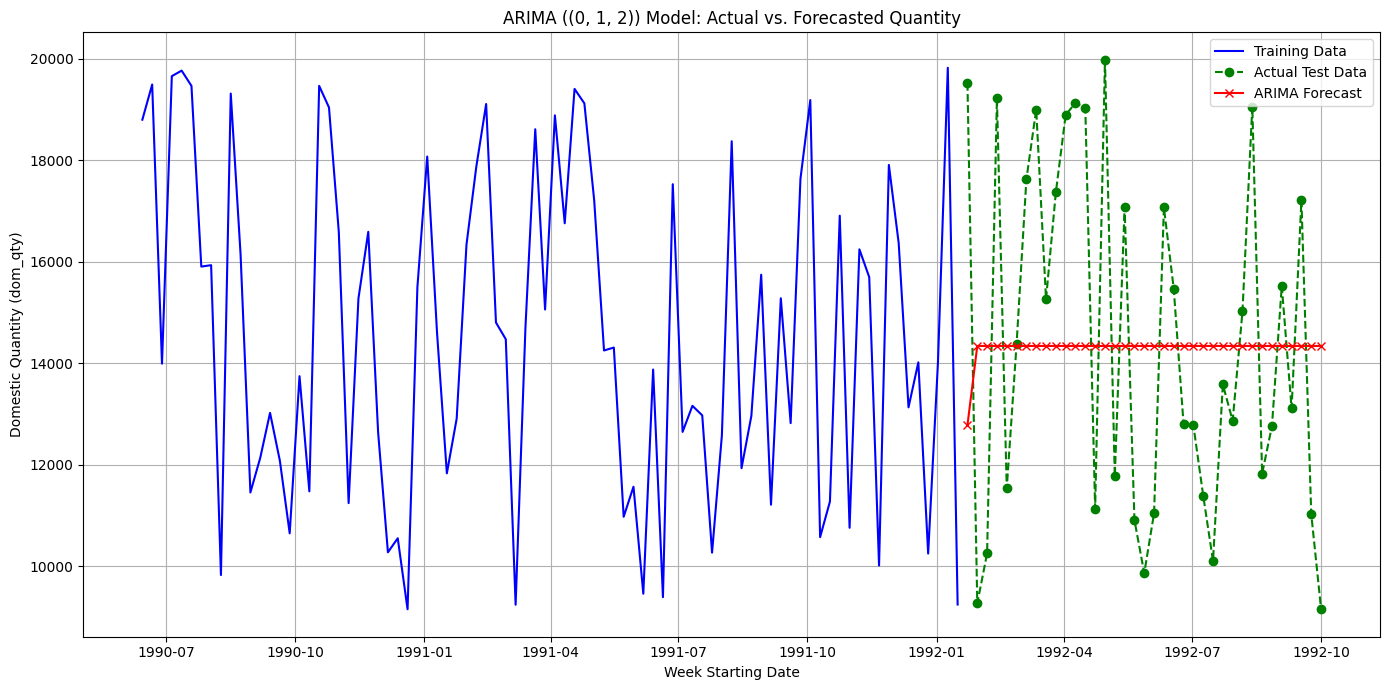

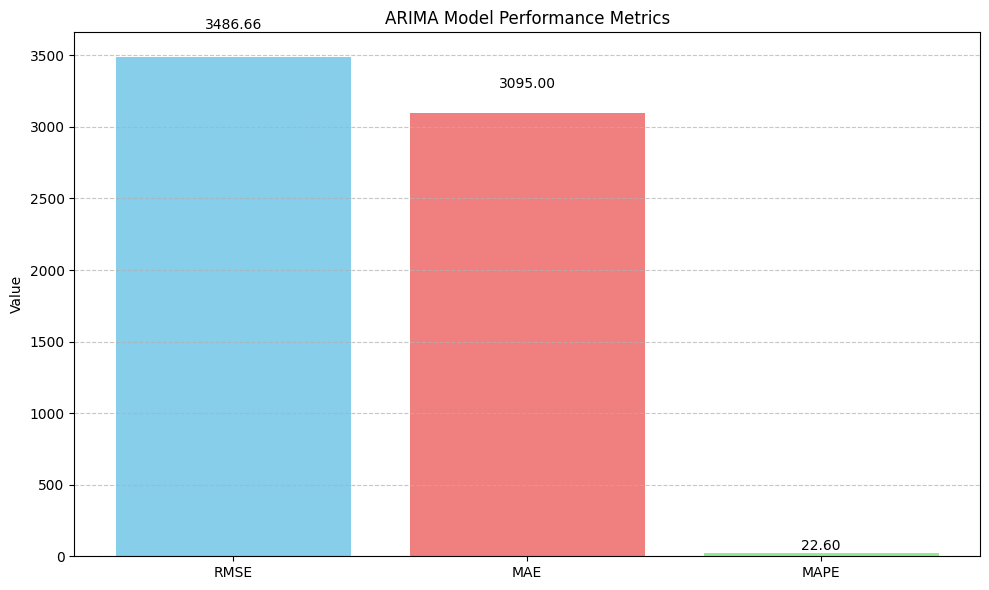


--- Forecasting Model Development Complete ---


In [32]:





# --- 7. Plotting the Metrics and Forecast ---

# Plot 1: Actual vs. Predicted Values
plt.figure(figsize=(14, 7))
plt.plot(train_data['dom_qty'], label='Training Data', color='blue')
plt.plot(test_data['dom_qty'], label='Actual Test Data', color='green', marker='o', linestyle='--')
plt.plot(predictions, label='ARIMA Forecast', color='red', marker='x')
plt.title(f'ARIMA ({best_order}) Model: Actual vs. Forecasted Quantity')
plt.xlabel('Week Starting Date')
plt.ylabel('Domestic Quantity (dom_qty)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Evaluation Metrics Bar Chart
metrics_names = ['RMSE', 'MAE', 'MAPE']
metrics_values = [rmse, mae, mape]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('ARIMA Model Performance Metrics')
plt.ylabel('Value')
for i, val in enumerate(metrics_values):
    plt.text(i, val + (val*0.05), f'{val:.2f}', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Forecasting Model Development Complete ---")